# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Por definición, cda una de las entradas de A es 
 
$a_{ij}= \left\{ \begin{array}{lcc} (1-p)/n + (p\,w_{ij})/c_j & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

Por definición, las entradas de W son  

$w_{ij}= \left\{ \begin{array}{lcc} 1 & si & \text{la página j tiene link a la página i} \\ \\ 0 & si & \text{la página j no tiene link a la página i} \end{array} \right.$

Sabemos que la diagonal es 0 pues no hay autolinks

D es una matriz diagonal con elementos djj como
 
$d_{jj}= \left\{ \begin{array}{lcc} 1/c_j & si & c_j \neq 0 \\ \\ 0 & si & c_j=0 \end{array} \right.$

entonces teniendo en cuenta el la definición de rango, las entradas de WD serán

$(WD)_{ij}= \left\{ \begin{array}{lcc} w_{ij}/c_j & si & c_j \neq 0 \\ \\ 0 & si & c_j=0 \end{array} \right.$

luego 

$(pWD)_{ij}= \left\{ \begin{array}{lcc} (p\,w_{ij})/c_j & si & c_j \neq 0 \\ \\ 0 & si & c_j=0 \end{array} \right.$

Por otro lado tenemos z, un vector de dimensión n con elementos como 

$z_{j}= \left\{ \begin{array}{lcc} (1-p)/n & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

y e, un vector de tamaño n con todas sus entradas iguales a 1

el producto $ez^t$ tendría los elementos como 

$(ez^t)_{ij}= \left\{ \begin{array}{lcc} (1-p)/n & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

concluyendo, la suma $pWD + ez^t$ se define por entrada como

$(pWD + ez^t)_{ij}= \left\{ \begin{array}{lcc} (1-p)/n + (p\,w_{ij})/c_j  & si & c_j \neq 0 \\ \\ 1/n & si & c_j=0 \end{array} \right.$

Lo cual es igual a A.

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

$ \textbf{Comienzo demostrando que (I - pWD) tiene factorización LU} \\ $

$ \text{Llamo a (I - pWD) = H} $

$ \text{Queremos ver que es, y todas sus submatrices, inversible. Sabiendo que } det(H) = det(H^t) $

$ (1.)\;\text{Comienzo viendo si } H^t\:es\:EDD $

$ \forall i\; con \: 1 \leqslant i \leqslant n \Rightarrow \ |(H^t)_{ii}| > \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| $

$ Como \; |(H^t)_{ii}| = 1 \; , \; \forall i \; con \: 1 \leqslant i \leqslant n , \; entonces\; es\; lo\; mismo$

$ \forall i\; con \: 1 \leqslant i \leqslant n \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| $

$ Ahora $

$ \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| = \sum_{j=1\wedge j\neq i}^{n} |-p\frac{(W^t)_{ij}}{c_i}| $

$ Como\; p>0, \:y\; \frac{(W^t)_{ij}}{c_i} \geq 0 $

$ \sum_{j=1\wedge j\neq i}^{n} |(H^t)_{ij}| = \sum_{j=1\wedge j\neq i}^{n} p\frac{(W^t)_{ij}}{c_i} = p* \sum_{j=1\wedge j\neq i}^{n} \frac{(W^t)_{ij}}{c_i} $

$ Como \; p < 1 $

$ p* \sum_{j=1\wedge j\neq i}^{n} \frac{(W^t)_{ij}}{c_i} < \sum_{j=1\wedge j\neq i}^{n} \frac{(W^t)_{ij}}{c_i} = \frac{1}{c_i}* \sum_{j=1\wedge j\neq i}^{n} (W^t)_{ij} $

$ Ahora \; \sum_{j=1\wedge j\neq i}^{n} (W^t)_{ij} = c_i \; , entonces $

$ \frac{1}{c_i}* \sum_{j=1\wedge j\neq i}^{n} (W^t)_{ij} = \frac{c_i}{c_i} = 1,\; por\; lo\; tanto,\; H^t\; es\; EDD$

$ \text{Si H transpuesta es EDD, entonces H transpuesta es inversible.} $
$ \text{Si H transpuesta es inversible entonces H es inversible.} $

$(2.)\; \text{Ahora queremos probar que si H transpuesta es EDD, entonces sus submatrices también son EDD} $

$ Caso\; base: \forall i\; con \: 1 \leqslant i \leqslant n \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{n} |(H^t)[1:n,1:n]_{ij}|,\; ya\; está\; demostrado $

$ H.I.: \forall i\; con \: 1 \leqslant i \leqslant k \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{k} |(H^t)[1:k,1:k]_{ij}| $

$ Qpq :  \forall i\; con \: 1 \leqslant i \leqslant k-1 \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}| $

$ Por\; hipótesis\; inductiva\; puedo\; decir $

$ \forall i\; con \: 1 \leqslant i \leqslant k-1 \Rightarrow \ 1 > \sum_{j=1\wedge j\neq i}^{k} |(H^t)[1:k,1:k]_{ij}| $

$ Ahora $

$ \sum_{j=1\wedge j\neq i}^{k} |(H^t)[1:k,1:k]_{ij}| = |(H^t)[1:k,1:k]_{ik}| + \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}| $

$ Como\; |(H^t)[1:k,1:k]_{ik}| \geq 0 $

$ |(H^t)[1:k,1:k]_{ik}| + \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}| \geq \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}|  $

$ Entonces,\; juntando\; las\; desigualdades $

$ 1 > \sum_{j=1\wedge j\neq i}^{k-1} |(H^t)[1:k-1,1:k-1]_{ij}|\;, \forall i\; con \: 1 \leqslant i \leqslant k-1 $

$ Lo\; que\; queríamos\; probar $

$ \text{Si cada submatriz de H transpuesta es EDD, entonces cada submatriz de H transpuesta es inversible.} $
$ \text{Si cada submatriz de H transpuesta es inversible entonces cada submatriz de H es inversible.} $

$ Siendo\; H \in R^{\,n\times n}\; y\; como\; \forall k\; con\; 1 \leq k \leq n,\; H[1:k,1:k]\; es\; invertible,\\ entonces\; existe\; factorización\; LU\; de\; H$


Me fijo ahora si (I - pWD) está bien condicionada y cómo influye el valor de p. Para esto utilizaré en principio una matriz T = (I - pWD) de tamaño (6x6) tal que todas las páginas tengan links a todas las demás.

Podemos apreciar que para valores de p entre 0 y 0.8, el número de condición de H es cercano a 1 y este comuenza a crecer abruptamente para p mayor a 0.8

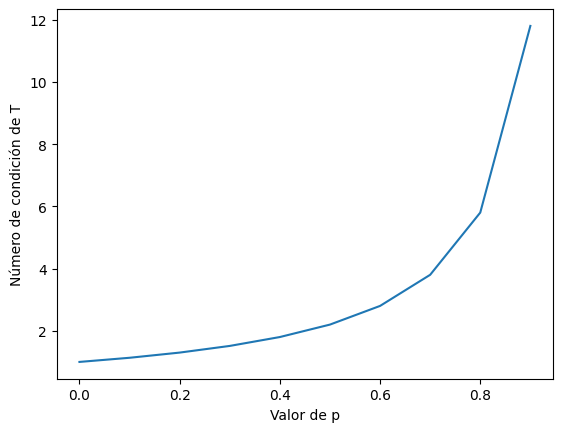

In [33]:
from funciones import *

def calcularA(W, p):
    npages = W.shape[0]

    #Definimos D
    D = np.zeros(W.shape)
    for i in range(npages):
        if sumColumna(W, i) != 0:
            D[i,i] = 1/sumColumna(W, i)
        else:
            D[i,i] = 0
    
    #Definimos A
    A = np.identity(npages) - np.dot(p, np.dot(W,D)) 
    return A

W = np.array([[0,1,1,1,1,1],[1,0,1,1,1,1],[1,1,0,1,1,1],[1,1,1,0,1,1],[1,1,1,1,0,1],[1,1,1,1,1,0]]) #6 pag, 30 links
cond = []
ps = np.linspace(0,0.9,10)

for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0,1,0.1),cond)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de T')
plt.show()

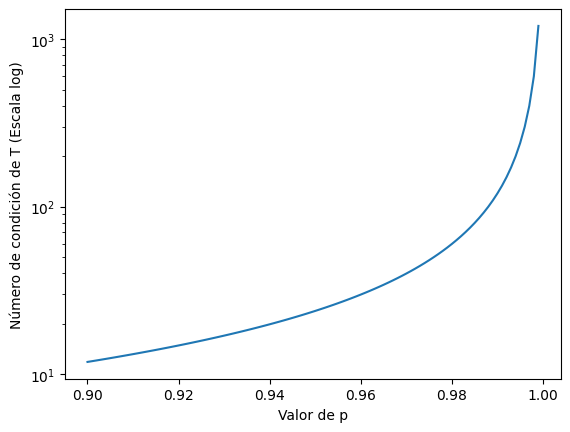

In [34]:
ps = np.linspace(0.9,0.999,100)
cond = []
for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0.9,1,0.001),cond)
plt.yscale("log")
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de T (Escala log)')
plt.show()

Hagamos el mismo análisis para M = (I - pWD) de (6x6) pero donde W es una matriz de densidad media. (15 links a otras páginas)

Podemos ver que el número de condición sigue cercano a 1 para valores de p entre 0 y 0.8, y este comienza a crecer abruptamente para valores mayores a 0.8

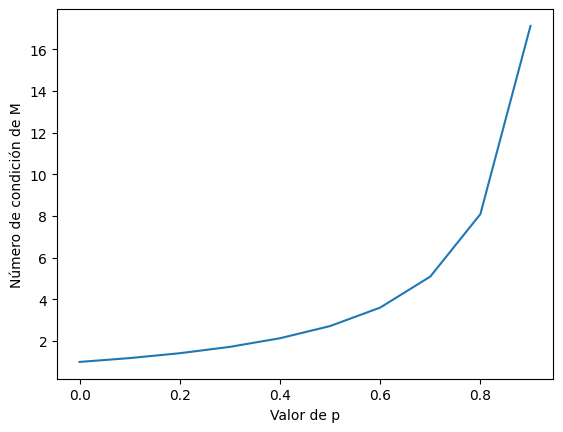

In [35]:
W = np.array([[0,0,1,0,1,0],[1,0,0,1,0,1],[1,0,0,1,0,0],[0,0,1,0,1,1],[0,1,0,1,0,0],[1,0,1,0,1,0]]) #6 pag, 30 links
cond = []
ps = np.linspace(0,0.9,10)

for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0,1,0.1),cond)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de M')
plt.show()

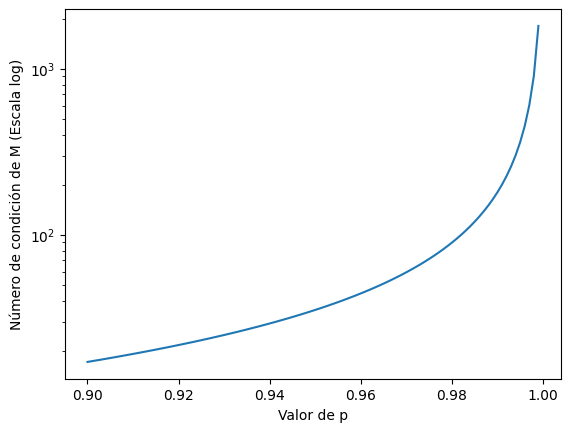

In [36]:
ps = np.linspace(0.9,0.999,100)
cond = []
for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0.9,1,0.001),cond)
plt.yscale("log")
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de M (Escala log)')
plt.show()

---

Ahora hago el mismo análisis para B = (I - pWD) pero donde W es una matriz de densidad baja (4 links a otras páginas). 

Esta vez el número de condición crece de forma casi constante, y mantiene valores cercanos a 1 para todo p entre 0 y 1. Esto se debe a que, si W tiene muchas entradas 0, el resultado de (I - pWD) será muy parecido a la identidad, la que tiene número de condición 1.

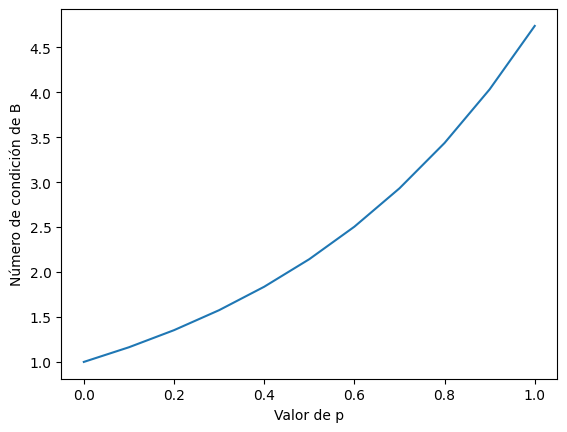

In [37]:

W = np.array([[0,0,0,0,1,0],[0,0,1,0,0,0],[0,0,0,0,0,0],[0,0,0,0,1,0],[0,1,0,0,0,0],[0,0,0,0,0,0]]) #6 pag, 3 links
cond = []
ps = np.linspace(0,1,11)

for i in ps:
    cond.append(np.linalg.cond(calcularA(W,i)))

fig, ax = plt.subplots()
ax.plot(np.arange(0,1.1,0.1),cond)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición de B')
plt.show()

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [38]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


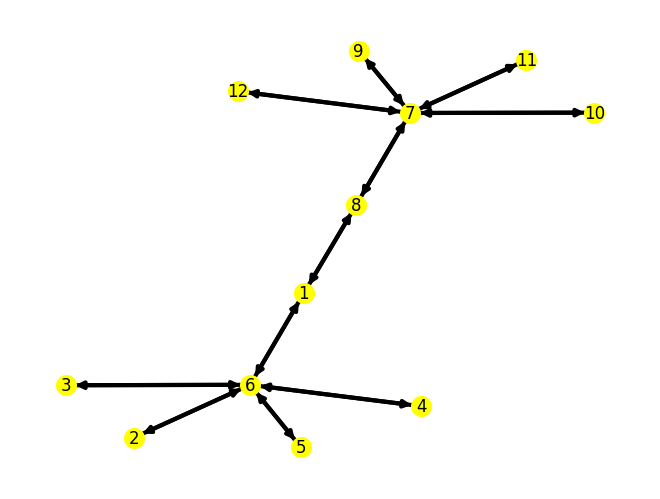

In [39]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.


Máximo ranking score: 0.142857142857

Rankings: [1. 2. 3. 4. 5. 6. 7.] 
Scores: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


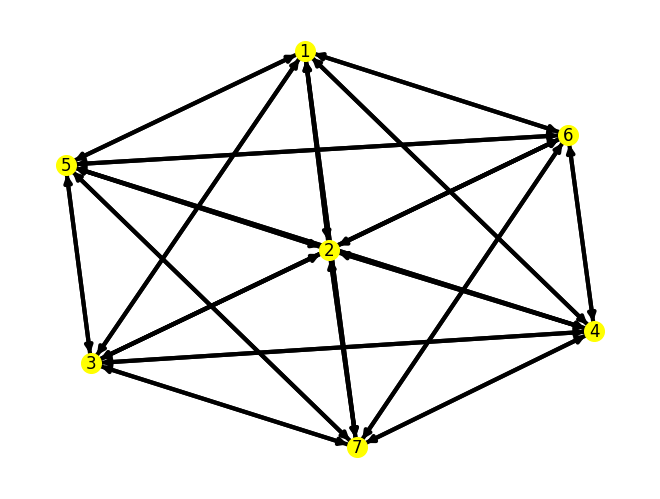

In [40]:
todos_conectados = np.array([[0,1,1,1,1,1,1],[1,0,1,1,1,1,1],[1,1,0,1,1,1,1],[1,1,1,0,1,1,1],[1,1,1,1,0,1,1],[1,1,1,1,1,0,1],[1,1,1,1,1,1,0]])

dibujarGrafo(todos_conectados,print_ejes=False)

print("\n" + "Máximo ranking score:", obtenerMaximoRankingScore(todos_conectados, p))

rnk, scr = calcularRanking(todos_conectados,p)
print("\n" + "Rankings:", rnk, "\n" + "Scores:", scr) 


Como podemos ver, en el caso TODOS LOS NODOS CONECTADOS, los scores son iguales para todos los nodos, lo cual era esperable pues cada nodo está conectado bilateralmente a la misma cantidad de nodos (todos menos si mismo) por lo tanto, el tráfico de usuarios en las distintas páginas se distribuye equitativamente.



---


Máximo ranking score: 0.2

Rankings: [1. 2. 3. 4. 5.] 
Scores: [0.2 0.2 0.2 0.2 0.2]


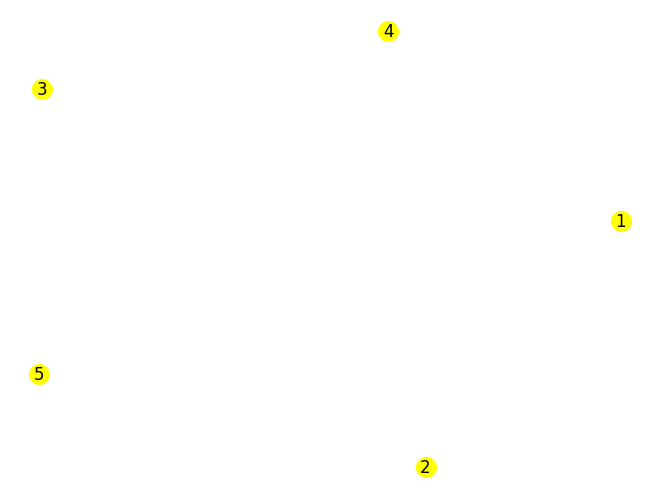

In [41]:
ninguno_conectado = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
dibujarGrafo(ninguno_conectado, print_ejes=False)

print("\n" + "Máximo ranking score:", obtenerMaximoRankingScore(ninguno_conectado, p))

rnk, scr = calcularRanking(ninguno_conectado,p)
print("\n" + "Rankings:", rnk, "\n" + "Scores:", scr)

De nuevo, todos los scores son identicos, pues según el funcionamiento del sistema, cuando una página no tiene links, cada visitante tiene 1/n posibilidades de ir a cada una de las otras páginas, y en este caso ninguna página tiene links, es decir, que sin importar en que página se encuentre un navegante, siempre tendrá iguales posibilidades de caer en cualquier otra, resultando nuevamente en una repartición equitativa

---


Máximo ranking score: 0.142857142857

Rankings: [7. 3. 4. 1. 8. 5. 6. 2.] 
Scores: [0.0952381  0.13095238 0.13095238 0.14285714 0.0952381  0.13095238
 0.13095238 0.14285714]


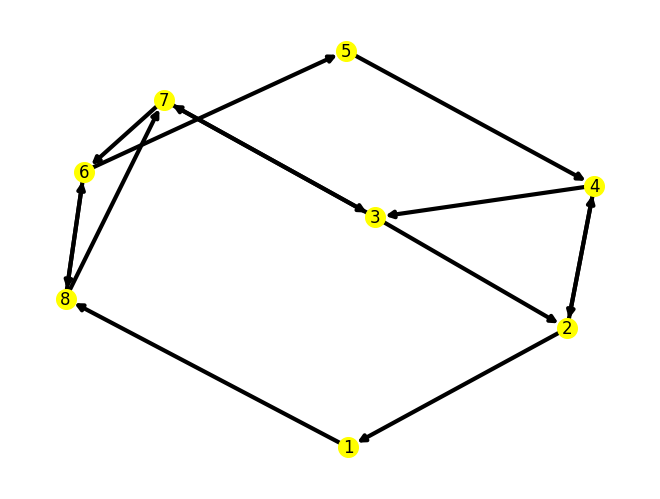

In [42]:
caso_particular1 = np.array([[0,1,0,0,0,0,0,0],[0,0,1,1,0,0,0,0],[0,0,0,1,0,0,1,0],[0,1,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,1],[0,0,1,0,0,0,0,1],[1,0,0,0,0,1,0,0]])

dibujarGrafo(caso_particular1, print_ejes=False)

print("\n" + "Máximo ranking score:", obtenerMaximoRankingScore(caso_particular1, p))

rnk, scr = calcularRanking(caso_particular1,p)
print("\n" + "Rankings:", rnk, "\n" + "Scores:", scr)

En este caso, nos encontramos con una especie de hexágono de páginas cuyos links varían entre unilaterales y bilaterales, pero que si nos fijamos bien, parece ser simétrico, lo cual nos llevaría a pensar que debería haber cierta similitud entre los scores de páginas de un lado y el otro, y en efecto, así es.
Los scores de las páginas 1 y 5, son iguales, tal como las páginas 4 y 8, y luego, las 2, 3, 7 y 8 que también poseen el mismo score. Así vemos como la simetría realmente afecta numericamente a los puntajes de las páginas, pues si el gráfico representa el tráfico, es lógico que la simetría del mismo signifique igualdad en el tráfico de ambos lados. 

---


Máximo ranking score: 0.125707213579

Rankings: [ 8.  1.  2.  3.  7.  9. 10.  6.  5.  4.] 
Scores: [0.08997525 0.12570721 0.11285361 0.1064268  0.09375    0.0875
 0.0875     0.09740099 0.09925743 0.09962871]


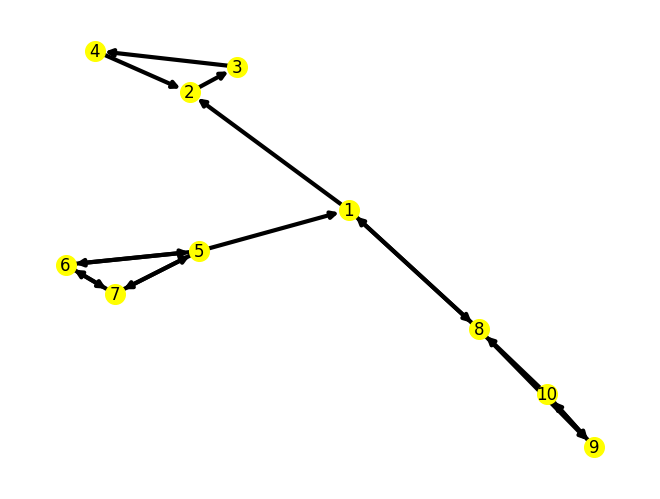

In [43]:
caso_particular2 = np.array([[0,0,0,0,1,0,0,1,0,0],[1,0,0,1,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,1,1,0,0,0],[0,0,0,0,1,0,1,0,0,0],[0,0,0,0,1,1,0,0,0,0],[1,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1],[0,0,0,0,0,0,0,0,1,0]])

dibujarGrafo(caso_particular2, print_ejes=False)

print("\n" + "Máximo ranking score:", obtenerMaximoRankingScore(caso_particular2, p))

rnk, scr = calcularRanking(caso_particular2,p)
print("\n" + "Rankings:", rnk, "\n" + "Scores:", scr)

En este caso particular aparte, se debería observar (a pesar de que la función lo grafica de una manera un poco extraña) una página centrica conectada de distintas maneras a tres tríos de páginas con distintos tipos de conexiones entre sí, según el ranking, vemos que la página con mayor score es la número 2, pero no solo eso, sino que le siguen la 3 y 4, que son las otras dos que conforman ese triangulo, esto se debe a que no están conectadas a la página 1 que haría de puente entre ellas y el resto, de manera tal que todo el tráfico que entra, no sale.

Por otro lado, las tres siguientes páginas son las 8, 9 y 10 que conforman otro triangulo, y en este caso, poseen una única conexión bilateral con la página 1, es decir que reciben navegantes pero también los ceden, a diferencia del grupo antes mencionado, sin embargo, le ganan al tercer trío de páginas (5,6 y 7), que solo envían tráfico a la página 1, pero no lo reciben, perdiendo a la larga a la mayoría de navegantes.


---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


---
Analizamos primero el tiempo de procesamiento en función de la cantidad de links. En el siguiente gráfico uso un grafo de 200 páginas y un valor de p = 0.5

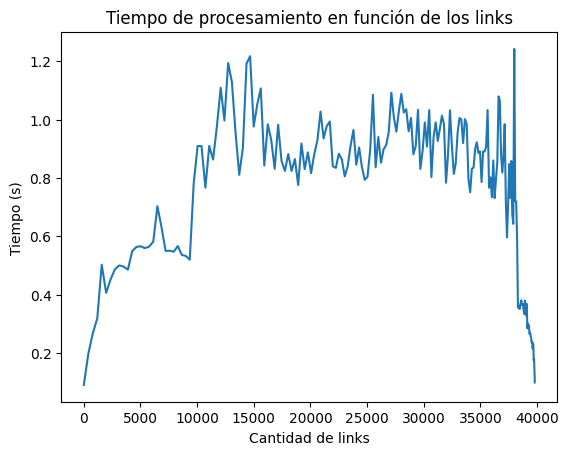

In [50]:
densidad = np.zeros((200,200))

cantLinks = []
tiempoLinks = []
(l,t) = calcularTiempoLinks(densidad)
cantLinks.append(l)
tiempoLinks.append(t)

for i in range(199):
    densidad = densidad + np.eye(200,k=i+1)
    densidad = densidad + np.eye(200,k=-(i+1))
    (l,t) = calcularTiempoLinks(densidad)
    cantLinks.append(l)
    tiempoLinks.append(t)

        
#Gráfico tiempo en función de la cantidad de links
fig, ax = plt.subplots()
plt.title('Tiempo de procesamiento en función de los links')
plt.xlabel("Cantidad de links")
plt.ylabel("Tiempo (s)")
ax.plot(cantLinks,tiempoLinks)
plt.show()

Podemos ver que el tiempo de procesamiento, sin contar los bordes, oscila pero se mantiene en los mismos valores para diferentes grafos de diferentes densidades. Para los bordes se ve que el tiempo disminuye bastante, esto es cuando hay muy pocos links o cuando están casi todas las páginas linkeadas entre si, esto debe ser porque nuestra función funciona de forma más eficiente en estos casos.

En el siguiente gráfico analizamos el tiempo de procesamiento según la cantidad de páginas. Para cada grafo de páginas existen 10 links, y fijamos p = 0.5

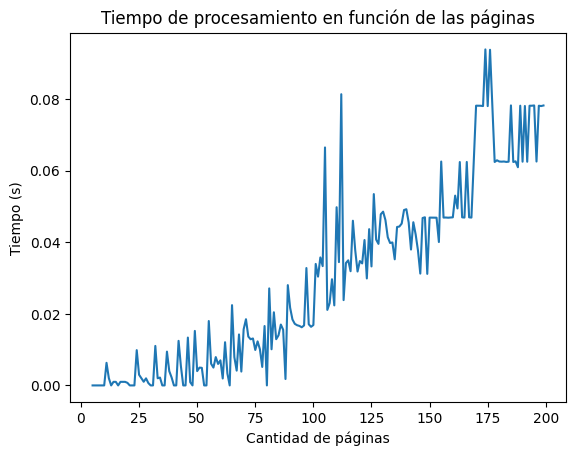

In [46]:
cantPaginas = []
tiempoPaginas = []

for i in range(5,200):
    paginas = np.zeros((i,i))
    for j in range(4):
        paginas = paginas + np.eye(i, k=(i-j))

    (l,t) = calcularTiempoPag(paginas)
    cantPaginas.append(l)
    tiempoPaginas.append(t)

        
#Gráfico tiempo en función de la cantidad de links
fig, ax = plt.subplots()
plt.title('Tiempo de procesamiento en función de las páginas')
plt.xlabel("Cantidad de páginas")
plt.ylabel("Tiempo (s)")
ax.plot(cantPaginas,tiempoPaginas)
plt.show()

Podemos concluir que el tiempo de procesamiento aumenta cuando tenemos mayor número de páginas.

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


In [47]:
#Nombro todos los tests
instagram_famosos = leer_archivo('./tests/instagram_famosos_grafo.txt')
mathworld = leer_archivo('./tests/mathworld_grafo.txt')
test_15s = leer_archivo('./tests/test_15_segundos.txt')
test_30s = leer_archivo('./tests/test_30_segundos.txt')
test_aleatorio = leer_archivo('./tests/test_aleatorio.txt')
test_dos_estrellas = leer_archivo('./tests/test_dosestrellas.txt')

#Todos los valores de p a probar
variacion_p = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95] 

FileNotFoundError: [Errno 2] No such file or directory: './tests/test_15_segundos.txt'

#### Test Instagram famosos

In [ ]:
#Instagram famosos: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []

#Buscamos las páginas de mayor score con p = 0.95, es decir cuando el flujo es lo menos aleatorio posible
rnk, scr = calcularRanking(instagram_famosos,0.95) #Calculamos ranking con p=0.95
for i in range(len(instagram_famosos)):
    if rnk[i] == 1:
        pagina_top1 = i
    elif rnk[i] == 2:
        pagina_top2 = i
    elif rnk[i] == 3:
        pagina_top3 = i
        
for value in variacion_p:
    rnk,scr = calcularRanking(instagram_famosos,value)
    scr_1.append(scr[pagina_top1])
    scr_2.append(scr[pagina_top2])
    scr_3.append(scr[pagina_top3])
                

Con p = 0.95 los scores del top 3 son:
1. Página 8 : 0.116290630236 
2. Página 9 : 0.101110354069 
3: Página 11 : 0.077344930551


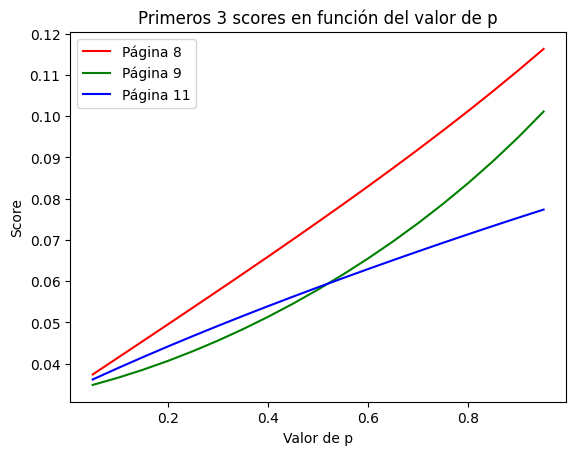

In [ ]:
print('Con p = 0.95 los scores del top 3 son:')
print('1.', 'Página', pagina_top1+1, ':', scr[pagina_top1], '\n' + '2.','Página', pagina_top2+1, ':', scr[pagina_top2], '\n' + '3:','Página', pagina_top3+1, ':', scr[pagina_top3])

fig, ax = plt.subplots()
plt.title("Primeros 3 scores en función del valor de p")
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = 'Página 8', color='red')
ax.plot(variacion_p,scr_2, label = 'Página 9', color='green')
ax.plot(variacion_p,scr_3, label = 'Página 11', color='blue')
ax.legend()
plt.show()

En el gráfico se observa cómo la página 8 permanece primera sin importar el valor de p, sin embargo, la página 9 comienza tercera para posteriormente superar a la 11, el aumento de puntaje de la 11 es lineal respecto a p y el de la 9 crece formando una curva convexa, que aumenta cada vez más rapido, esto es debido a como está compuesta la red de links, un mayor p favorece más al crecimiento de la página 9, pues al aumentar el p, el tráfico de navegantes por los links aumenta y la página 9 recibe más tráfico en relación al que cede que la página 11.

#### Test mathworld

In [ ]:
#Mathworld: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []
#Buscamos las páginas de mayor score con p = 0.95, es decir cuando el flujo es lo menos aleatorio posible
rnk, scr = calcularRanking(mathworld,0.95) #Calculamos ranking con p=0.99
for i in range(len(mathworld)):
    if rnk[i] == 1:
        pagina_top1 = i
    elif rnk[i] == 2:
        pagina_top2 = i
    elif rnk[i] == 3:
        pagina_top3 = i
        
for value in variacion_p:
    rnk,scr = calcularRanking(mathworld,value)
    scr_1.append(scr[pagina_top1])
    scr_2.append(scr[pagina_top2])
    scr_3.append(scr[pagina_top3])
                

Con p = 0.95 los scores del top 3 son:
1. Página 4 : 0.202447606115 
2. Página 1 : 0.201177265272 
3: Página 3 : 0.146903442973


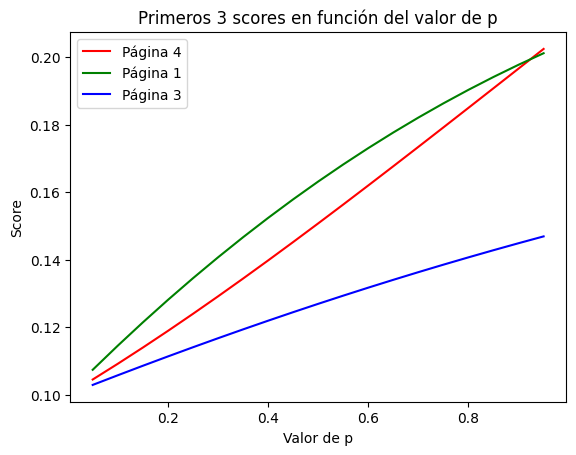

In [ ]:
print('Con p = 0.95 los scores del top 3 son:')
print('1.', 'Página', pagina_top1+1, ':', scr[pagina_top1], '\n' + '2.','Página', pagina_top2+1, ':', scr[pagina_top2], '\n' + '3:','Página', pagina_top3+1, ':', scr[pagina_top3])

fig, ax = plt.subplots()
plt.title("Primeros 3 scores en función del valor de p")
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = 'Página 4', color = 'red')
ax.plot(variacion_p,scr_2, label = 'Página 1', color = 'green')
ax.plot(variacion_p,scr_3, label = 'Página 3', color = 'blue')
ax.legend()
plt.show()

En el caso Mathworld, vemos como con el p más alto, la página 4 queda primera en el ranking, apenas por encima de la página 1, pero con los p menores no es así, en el gráfico se observa como tanto la linea roja como la azul tienen un crecimiento lineal respecto a p, es decir que crecen proporcionalmente a p, pero la verde crece de manera curva y al acercarnos al final el crecimiento disminuye, permitiendole así a la página 4 alcanzar a la 1, pues el p más alto, dado el grafo de links, beneficia más el crecimiento de la 4 que de la 1.

#### Test aleatorio

In [ ]:
#test_aleatorio: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_2 = []
scr_3 = []
#Buscamos las páginas de mayor score con p = 0.95, es decir cuando el flujo es lo menos aleatorio posible
rnk, scr = calcularRanking(test_aleatorio,0.95) #Calculamos ranking con p=0.99
for i in range(len(test_aleatorio)):
    if rnk[i] == 1:
        pagina_top1 = i
    elif rnk[i] == 2:
        pagina_top2 = i
    elif rnk[i] == 3:
        pagina_top3 = i
        
for value in variacion_p:
    rnk,scr = calcularRanking(test_aleatorio,value)
    scr_1.append(scr[pagina_top1])
    scr_2.append(scr[pagina_top2])
    scr_3.append(scr[pagina_top3])
                

Con p = 0.95 los scores del top 3 son:
1. Página 5 : 0.289940828402 
2. Página 1 : 0.220208224103 
3: Página 4 : 0.220208224103


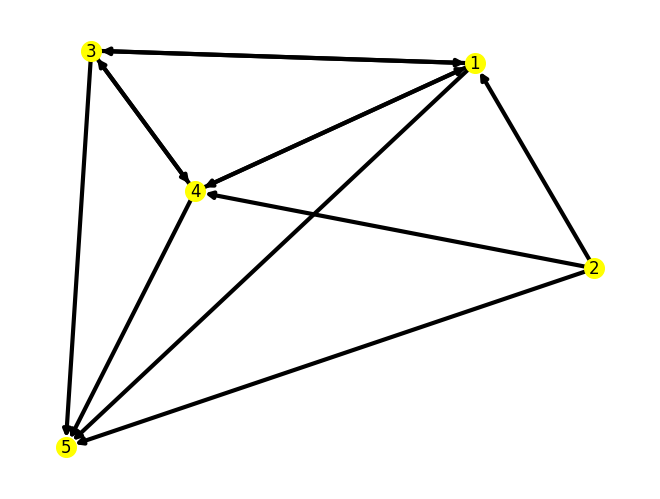

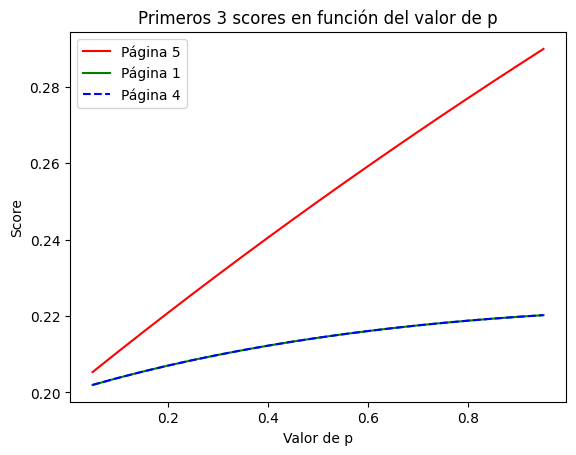

In [ ]:
print('Con p = 0.95 los scores del top 3 son:')
print('1.', 'Página', pagina_top1+1, ':', scr[pagina_top1], '\n' + '2.','Página', pagina_top2+1, ':', scr[pagina_top2], '\n' + '3:','Página', pagina_top3+1, ':', scr[pagina_top3])


dibujarGrafo(test_aleatorio, print_ejes=False)

fig, ax = plt.subplots()
plt.title("Primeros 3 scores en función del valor de p")
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = 'Página 5', color = 'red')
ax.plot(variacion_p,scr_2, label = 'Página 1', color = 'green')
ax.plot(variacion_p,scr_3, label = 'Página 4', color = 'blue',linestyle = 'dashed')
ax.legend()
plt.show()

En el 'test aleatorio' vemos como sin importar el valor de p, la página 5 siempre está primera, y le siguen las páginas 1 y 4 que siempre tienen el mismo score. No solo eso, sinó que a más crece el valor de p, más se agranda la diferencia entre la primera y segunda posición, pues según el flujo de los links, la página 5 es la que mayor tráfico de navegantes recibe en relación a la que cede, entoncesn mientras más aumneta la p, es decir, mientras más probabilidad hay de que los navegantes viajen a traves de los links, más se agranda la diferencia.

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



---
Comienzo fijándome cómo son los puntajes para algún valor de p, por ejemplo 0.5

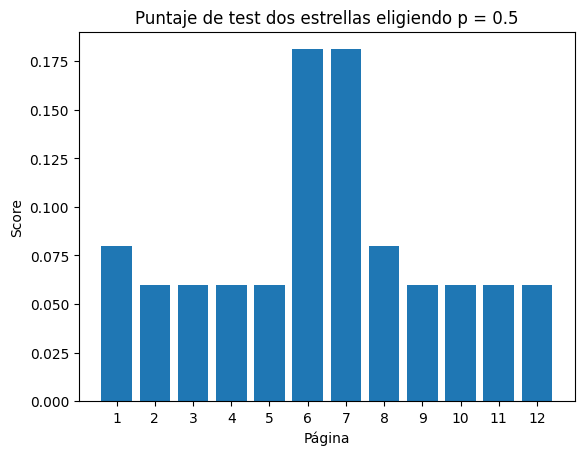

Página 6:  0.18115942029
Página 7:  0.18115942029
Página 1:  0.079710144928
Página 8:  0.079710144928


In [ ]:
rnk,scr = calcularRanking(test_dos_estrellas,0.5)

x = ["1","2","3","4","5","6","7","8","9","10","11","12"]

fig,ax = plt.subplots()

ax.bar(x,scr)
ax.set_title("Puntaje de test dos estrellas eligiendo p = 0.5")
plt.ylabel("Score")
plt.xlabel("Página")

plt.show()


print("Página 6: ",scr[5])
print("Página 7: ",scr[6])
print("Página 1: ",scr[0])
print("Página 8: ",scr[7])

Podemos ver que las páginas 6 y 7 tienen los mayores puntajes, siguiéndolas la 1 y 8. 

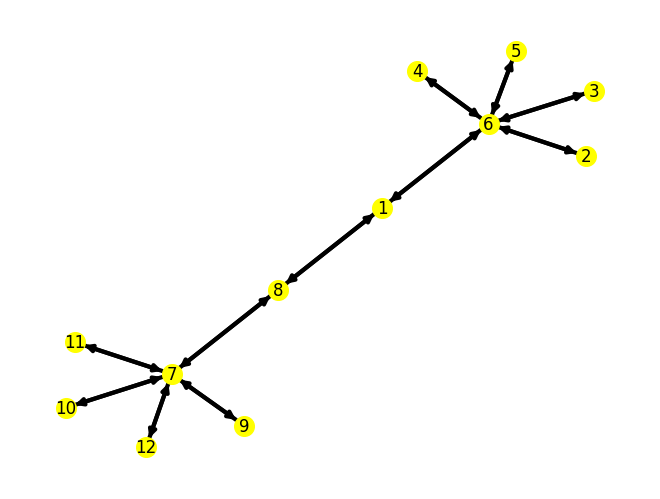

In [ ]:
dibujarGrafo(W, print_ejes=False)

Grafico ahora los puntajes de las páginas 6, 7, 1 y 8 viendo cómo varían según el valor de p.

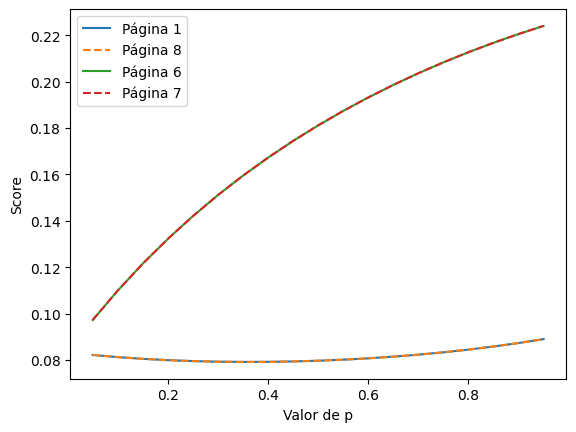

Puntajes de la pag 1:  [0.082194010417, 0.081261950287, 0.080519074422, 0.079950799508, 0.079545454545, 0.079293836026, 0.079188869153, 0.079225352113, 0.0793997669, 0.079710144928, 0.080155979203, 0.080738177624, 0.08145905421, 0.082322357019, 0.083333333333, 0.084498834499, 0.085827464789, 0.087329780935, 0.089018551765]
Puntajes de la pag 8:  [0.082194010417, 0.081261950287, 0.080519074422, 0.079950799508, 0.079545454545, 0.079293836026, 0.079188869153, 0.079225352113, 0.0793997669, 0.079710144928, 0.080155979203, 0.080738177624, 0.08145905421, 0.082322357019, 0.083333333333, 0.084498834499, 0.085827464789, 0.087329780935, 0.089018551765]
Puntajes de la pag 6:  [0.097249348958, 0.109942638623, 0.121560350219, 0.132226322263, 0.142045454545, 0.151107121484, 0.159487862641, 0.167253521127, 0.174460955711, 0.18115942029, 0.187391681109, 0.193194925029, 0.198601499423, 0.203639514731, 0.208333333333, 0.212703962704, 0.216769366197, 0.220544701007, 0.224042489527]
Puntajes de la pag 7:  

In [ ]:
#test_dos estrellas: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_8 = []
scr_6 = []
scr_7 = []
for value in variacion_p:
    rnk,scr = calcularRanking(test_dos_estrellas,value)
    scr_1.append(scr[0])
    scr_8.append(scr[7])
    scr_6.append(scr[5])
    scr_7.append(scr[6])

fig, ax = plt.subplots()
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = "Página 1")
ax.plot(variacion_p,scr_8, label = 'Página 8', linestyle='dashed')
ax.plot(variacion_p,scr_6, label = 'Página 6')
ax.plot(variacion_p,scr_7, label = 'Página 7', linestyle='dashed')
ax.legend()
plt.show()

print("Puntajes de la pag 1: ",scr_1)
print("Puntajes de la pag 8: ",scr_8)
print("Puntajes de la pag 6: ",scr_6)
print("Puntajes de la pag 7: ",scr_7)

Podemos ver que tanto las páginas 6 y 7 como 1 y 8 obtienen el mismo puntaje para los distintos valores de p, quedando siempre 6 y 7 por encima.

Si quisieramos agregar links para que la página 1 obtenga el mayor puntaje para distintos valores de p, podría subir el puntaje de la página 1 o podría bajar el puntaje de las páginas 6 y 7. La mejor forma de lograrlo es haciendo estas dos cosas a la vez, esto es, añadiendo links a la página 1 a las que no lo tengan, estas serían la página 7 o las que sólo tienen un link (páginas 2, 3, 4, 5, 9, 10, 11 y 12).

El siguiente gráfico muestra cómo varían los puntajes, tomando p = 0.3 como ejemplo, de las páginas 1, 8, 6 y 7 al ir añadiendo un link a la página 1 a las páginas 2, 9, 3... Estas son las páginas de un solo link que están linkeadas con 6 o 7, puestas de forma intercalada para disminuir de forma uniforme los puntajes de las páginas 6 y 7.

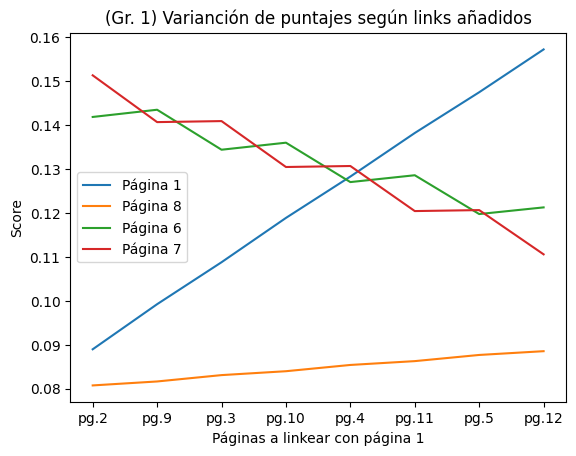

In [ ]:
scr_1 = []
scr_8 = []
scr_6 = []
scr_7 = []
valores = [1,8,2,9,3,10,4,11]
testModificado = test_dos_estrellas.copy()
for val in valores:
    testModificado[0,val] = 1
    rnk,scr = calcularRanking(testModificado,0.3)
    scr_1.append(scr[0])
    scr_8.append(scr[7])
    scr_6.append(scr[5])
    scr_7.append(scr[6])
valoresChar = ["pg.2","pg.9","pg.3","pg.10","pg.4","pg.11","pg.5","pg.12"]
fig, ax = plt.subplots()
plt.xlabel('Páginas a linkear con página 1')
plt.ylabel('Score')
ax.plot(valoresChar,scr_1, label = "Página 1")
ax.plot(valoresChar,scr_8, label = 'Página 8')
ax.plot(valoresChar,scr_6, label = 'Página 6')
ax.plot(valoresChar,scr_7, label = 'Página 7')
ax.legend()
plt.title("(Gr. 1) Varianción de puntajes según links añadidos")
plt.show()

Vemos que al añadir 6 links hacia la página 1, siendo el último la página 11, la página 1 supera a las demás páginas.

Hagamos el mismo análisis pero comenzando por añadir un link hacia la página 1 a la página 7.

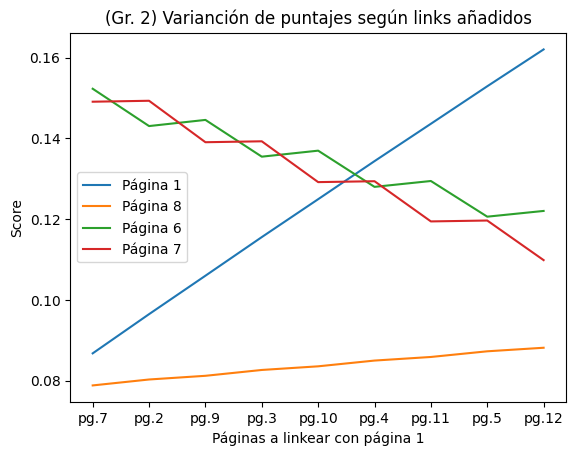

In [ ]:
scr_1 = []
scr_8 = []
scr_6 = []
scr_7 = []
valores = [6,1,8,2,9,3,10,4,11]
testModificado = test_dos_estrellas.copy()
for val in valores:
    testModificado[0,val] = 1
    rnk,scr = calcularRanking(testModificado,0.3)
    scr_1.append(scr[0])
    scr_8.append(scr[7])
    scr_6.append(scr[5])
    scr_7.append(scr[6])
valoresChar = ["pg.7","pg.2","pg.9","pg.3","pg.10","pg.4","pg.11","pg.5","pg.12"]
fig, ax = plt.subplots()
plt.xlabel('Páginas a linkear con página 1')
plt.ylabel('Score')
ax.plot(valoresChar,scr_1, label = "Página 1")
ax.plot(valoresChar,scr_8, label = 'Página 8')
ax.plot(valoresChar,scr_6, label = 'Página 6')
ax.plot(valoresChar,scr_7, label = 'Página 7')
ax.legend()
plt.title("(Gr. 2) Varianción de puntajes según links añadidos")
plt.show()

Podemos observar que también necesitamos añadir mínimo 6 links (hasta la pg.4) para que la página 1 quede primera en el ranking.

Veamos cómo varían los puntajes para distintos valores de p añadiendo 6 links como en el gráfico 1 (Gr. 1).

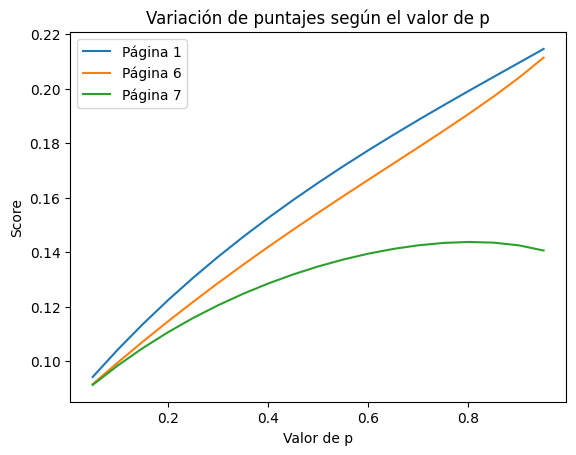

In [ ]:
#test_dos estrellas: Se mostrará el cambio de la probabilidad del top 3 de páginas en el ranking
scr_1 = []
scr_6 = []
scr_7 = []
testModificado = test_dos_estrellas.copy()
testModificado[0,1] = 1
testModificado[0,2] = 1
testModificado[0,3] = 1
testModificado[0,8] = 1
testModificado[0,9] = 1
testModificado[0,10] = 1

for value in variacion_p:
    rnk,scr = calcularRanking(testModificado,value)
    scr_1.append(scr[0])
    scr_6.append(scr[5])
    scr_7.append(scr[6])

fig, ax = plt.subplots()
plt.xlabel('Valor de p')
plt.ylabel('Score')
ax.plot(variacion_p,scr_1, label = "Página 1")
ax.plot(variacion_p,scr_6, label = 'Página 6')
ax.plot(variacion_p,scr_7, label = 'Página 7')
ax.legend()
ax.set_title("Variación de puntajes según el valor de p")
plt.show()

Vemos que siempre la página 1 obtiene el mejor puntaje. 
En conclusión, la mínima cantidad de links que se debe agregar son 6 y son links a la página 1 de páginas que no estén linkeadas a esta.